#Step 1: Data Loading and Initial Exploration

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('gym_members_exercise_tracking.csv')

In [3]:
# Display the first few rows
print(data.head())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

In [4]:
# Check data information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [5]:
# Display basic statistics
print(data.describe())

              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000 

#Step 2: Data Cleaning and Formatting

In [6]:
# Drop irrelevant columns if any (based on the initial exploration)
# For example, columns that may not contribute to prediction
data_cleaned = data.drop(columns=['Column_to_drop_if_any'], errors='ignore')

In [7]:
# Check for missing values
print(data_cleaned.isnull().sum())

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


In [8]:
# Fill missing values or drop rows with missing data
# Here, we might use mean/median filling or drop rows if missing data is minimal
data_cleaned = data_cleaned.dropna()  # Example, modify based on actual data

In [9]:
# Encode categorical variables if any exist
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

#Step 3: Exploratory Data Analysis (EDA)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

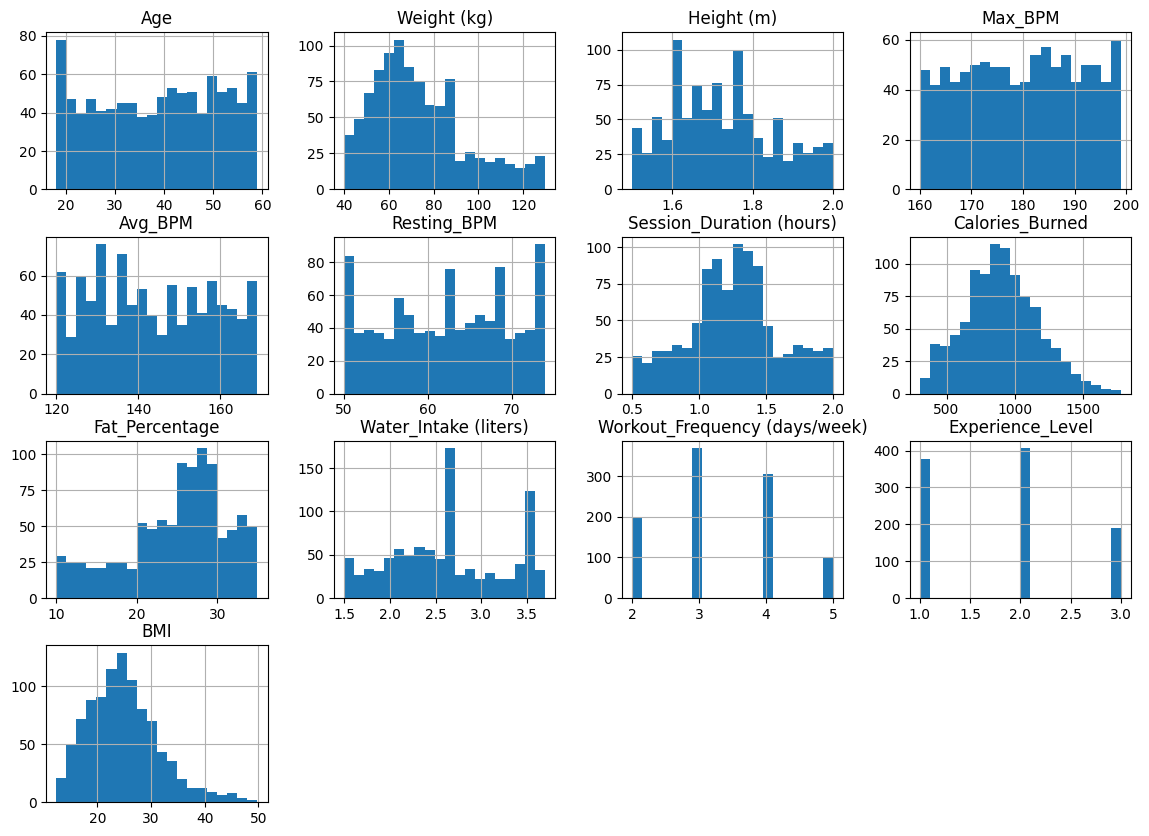

In [11]:
# Visualize distributions of numeric features
data_encoded.hist(bins=20, figsize=(14, 10))
plt.show()

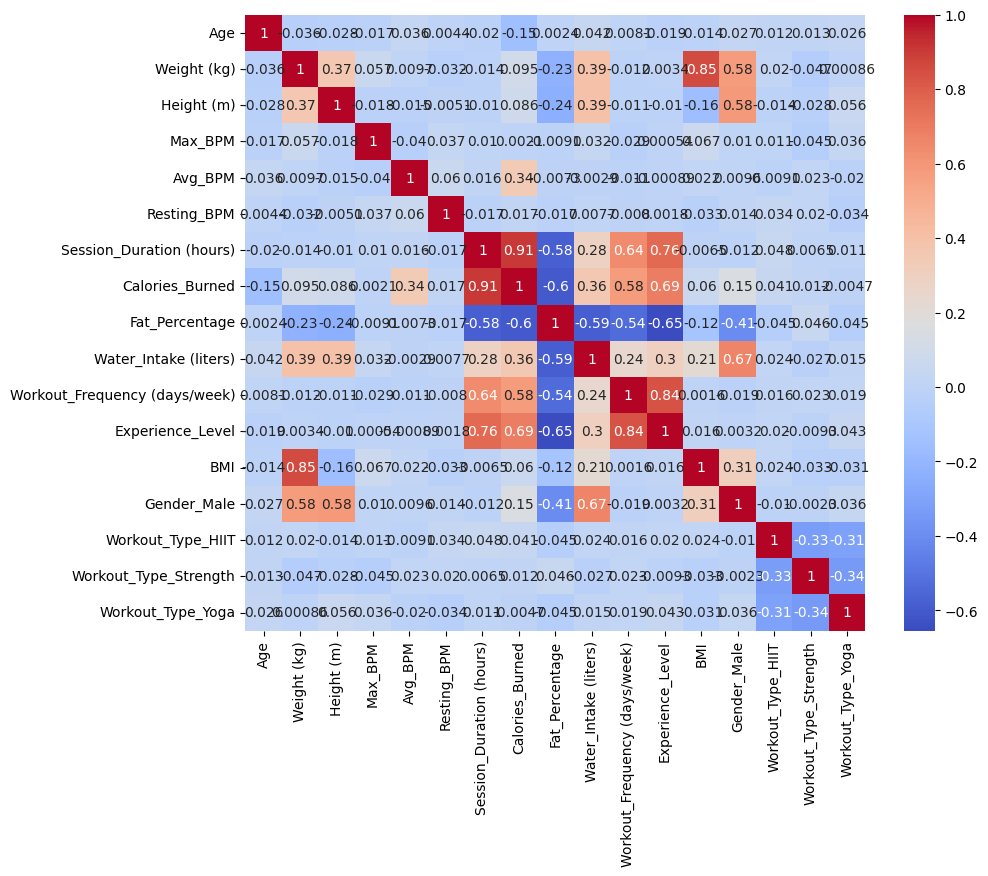

In [12]:
# Correlation matrix to identify relationships
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap="coolwarm")
plt.show()

#Step 4: Feature Engineering and Selection

In [15]:
# List all column names to see available options
print(data.columns)

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')


In [16]:
# Set 'Calories_Burned' as the target variable and prepare feature set
target_column = 'Calories_Burned'  # Target variable we want to predict

# Features: all columns except the target
X = data_encoded.drop(columns=[target_column], axis=1)
y = data_encoded[target_column]

# Display shapes to verify
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (973, 16)
Target shape: (973,)


#Step 5: Train-Test Split and Cross-Validation

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Scale features for consistency across models
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Step 6: Model Training and Comparison

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

In [23]:
# Define models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [24]:
# Compare models using cross-validation
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{model_name} - RMSE: {rmse_scores.mean():.4f}")

Linear Regression - RMSE: 40.0001
Random Forest - RMSE: 47.8407
Gradient Boosting - RMSE: 22.1084


In [25]:
# Compare models using cross-validation
print("Model Comparison (Average RMSE over 5-fold Cross-Validation):")
for model_name, model in models.items():
    # Cross-validate the model using negative mean squared error as the scoring metric
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    # Compute the RMSE scores
    rmse_scores = np.sqrt(-scores)
    print(f"{model_name} - RMSE: {rmse_scores.mean():.4f}")

Model Comparison (Average RMSE over 5-fold Cross-Validation):
Linear Regression - RMSE: 40.0001
Random Forest - RMSE: 47.8407
Gradient Boosting - RMSE: 22.1084


#Step 7: Hyperparameter Tuning on Best Model

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
# Assuming Random Forest performed best based on previous step
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [28]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


#Step 8: Final Model Evaluation and Interpretation

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
# Predict on the test set
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R^2 Score: {r2:.4f}")

Test RMSE: 48.3198
Test R^2 Score: 0.9720


In [31]:
# Feature importance for interpretation
importances = best_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

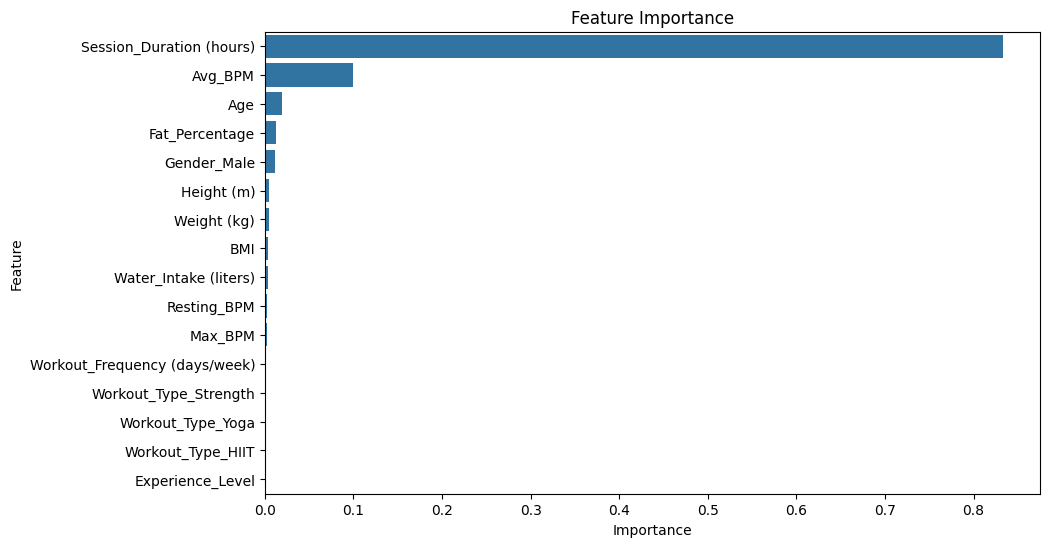

In [32]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()